<a href="https://colab.research.google.com/github/amilsiddik/percobaan/blob/main/Logistic_Regression_Pertemuan_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/Belajar/calonpembeli_ch5.csv')
df1.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [2]:
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [3]:
df1 = df1[df1['Usia']<=100]
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,501.073146,43.323647,1.469940,0.480962,0.953908,270.430862,0.634269
std,288.823862,11.774139,1.073338,0.499888,0.801127,95.026802,0.481876
min,1.000000,24.000000,0.000000,0.000000,0.000000,95.000000,0.000000
25%,252.250000,33.000000,1.000000,0.000000,0.000000,187.250000,0.000000
50%,501.500000,43.000000,1.000000,0.000000,1.000000,259.000000,1.000000
75%,750.750000,53.000000,2.000000,1.000000,2.000000,352.750000,1.000000
max,1000.000000,65.000000,3.000000,1.000000,4.000000,490.000000,1.000000


In [4]:
df1.isnull().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

In [5]:
df1.dropna()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [6]:
df1['Beli_Mobil'].value_counts()

1    633
0    365
Name: Beli_Mobil, dtype: int64

In [7]:
import sklearn.model_selection as ms
X=df1[['Usia','Status','Kelamin','Memiliki_Mobil','Penghasilan']]
y=df1.Beli_Mobil
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
import sklearn.linear_model as lm
model = lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
print(model.coef_)

[[-0.0159435  -0.17093131 -1.03941699  0.07720535  0.05686692]]


In [10]:
y_prediksi=model.predict(X_test)
print(y_prediksi)

[1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1]


In [11]:
y_test

272    1
727    0
31     0
344    1
606    1
      ..
937    1
624    0
257    1
274    0
486    1
Name: Beli_Mobil, Length: 200, dtype: int64

In [12]:
X_test


,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416
727,45,2,1,1,131
31,37,2,1,1,203
344,58,0,0,1,265
606,53,1,0,1,348
...,...,...,...,...,...
937,44,3,0,1,330
624,48,0,0,2,145
257,28,1,1,1,391
274,26,2,0,1,177


In [13]:
import sklearn.metrics as met
confusionmatrix = met.confusion_matrix(y_test,y_prediksi)
confusionmatrix

array([[ 59,   4],
       [  5, 132]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


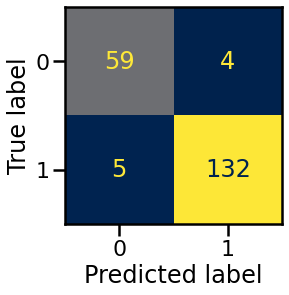

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
clf1=LogisticRegression().fit(X_train,y_train)
sns.set_context("poster")
disp = plot_confusion_matrix(clf1,X_test,y_test,cmap='cividis',colorbar=False)

acuracy=(TP+TN)/(TP+TM+FP+FN)

In [15]:
score=model.score(X_test, y_test)
score

0.955

In [16]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_prediksi)
score

0.955

precision=(TP)/(TP+FP)

In [17]:
precision=met.precision_score(y_test,y_prediksi)
precision

0.9705882352941176

recall(sensitivity)=TP/(TP+FN)

In [18]:
recall=met.recall_score(y_test,y_prediksi)
recall

0.9635036496350365

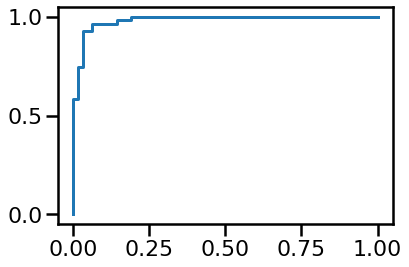

In [19]:
import matplotlib.pyplot as plt
y_pred_prob=model.predict_proba(X_test)[::,1]
fp,tp, _ =met.roc_curve(y_test,y_pred_prob)
plt.plot(fp,tp)
plt.show()

In [20]:
auc=met.roc_auc_score(y_test,y_prediksi)
auc

0.9500057930714866

**Data di Oversampling**

In [21]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resampled = ros.fit_resample(X_train,y_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.0 MB/s 
     |████████████████████████████████| 199 kB 54.3 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [22]:
X_train.value_counts

<bound method DataFrame.value_counts of      Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan
694    39       3        0               1          273
518    52       1        1               1          181
882    36       2        1               0          315
113    42       3        0               1          233
873    40       1        1               1          418
..    ...     ...      ...             ...          ...
837    37       0        0               1          369
192    37       2        0               1          290
631    44       0        1               2          222
561    42       2        1               2          180
686    44       2        0               0          216

[798 rows x 5 columns]>

In [23]:
y_train.value_counts


<bound method IndexOpsMixin.value_counts of 694    1
518    0
882    1
113    1
873    1
      ..
837    1
192    1
631    1
561    0
686    0
Name: Beli_Mobil, Length: 798, dtype: int64>

In [24]:
X_train_resampled.value_counts

<bound method DataFrame.value_counts of      Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan
0      39       3        0               1          273
1      52       1        1               1          181
2      36       2        1               0          315
3      42       3        0               1          233
4      40       1        1               1          418
..    ...     ...      ...             ...          ...
987    31       0        1               0          190
988    38       2        1               1          220
989    31       1        0               1          220
990    47       3        0               1          135
991    31       3        1               1          198

[992 rows x 5 columns]>

In [25]:
y_train_resampled.value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      1
3      1
4      1
      ..
987    0
988    0
989    0
990    0
991    0
Name: Beli_Mobil, Length: 992, dtype: int64>

In [39]:
df2=y_train_resampled
df2.value_counts()

1    496
0    496
Name: Beli_Mobil, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


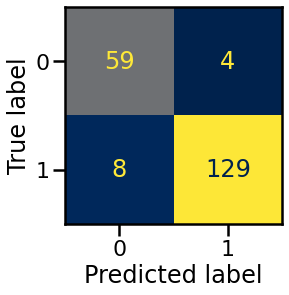

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

clf = LogisticRegression().fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)

sns.set_context("poster")

disp = plot_confusion_matrix(clf, X_test, y_test, cmap='cividis',colorbar=False)

In [27]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_pred)
score

0.94

In [28]:
precision=met.precision_score(y_test,y_pred)
precision

0.9699248120300752

In [29]:
recall=met.recall_score(y_test,y_pred)
recall

0.9416058394160584

In [30]:
auc=met.roc_auc_score(y_test,y_pred)
auc

0.9390568879619975

**Over-Sampling using SMOTE**

In [31]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()
X_train_resampled1, y_train_resampled1 = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


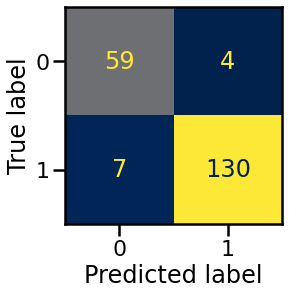

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

clf = LogisticRegression().fit(X_train_resampled1, y_train_resampled1)
y_pred1 = clf.predict(X_test)

sns.set_context("poster")

disp = plot_confusion_matrix(clf, X_test, y_test, cmap='cividis',colorbar=False)

In [33]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_pred1)
score

0.945

In [34]:
precision=met.precision_score(y_test,y_pred1)
precision

0.9701492537313433

In [35]:
recall=met.recall_score(y_test,y_pred1)
recall

0.948905109489051

In [36]:
auc=met.roc_auc_score(y_test,y_pred)
auc

0.9390568879619975

Feature Selection RFE

In [58]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lm.LogisticRegression(), n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)
print('Support = ',rfe.support_)
print('Ranking = ',rfe.ranking_)

Support =  [False  True  True False  True]
Ranking =  [3 1 1 2 1]


Penjelasan: Yg bernilai true, adalah feature no 2,3 dan 5 yaitu Status, Jenis Kelamin, dan Penghasilan. Artinya ketiga feature tersebut cukup berpengaruh dalam membuat model dengan akurasi yang tinggi, sehingga apabila dua feature lain diabaikan maka model tetap memberikan prediksi yg cukup baik.